### 라이브러리 불러오기

<Axes: >

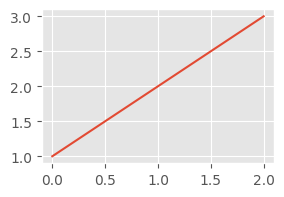

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
 
plt.style.use('ggplot')
pd.Series([1,2,3]).plot(figsize=(3,2))

In [5]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


## 데이터 불러오기

In [6]:
df = pd.read_csv('./data/advertising(in).csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
# 상위 5개의 행 확인
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


## 데이터 이해

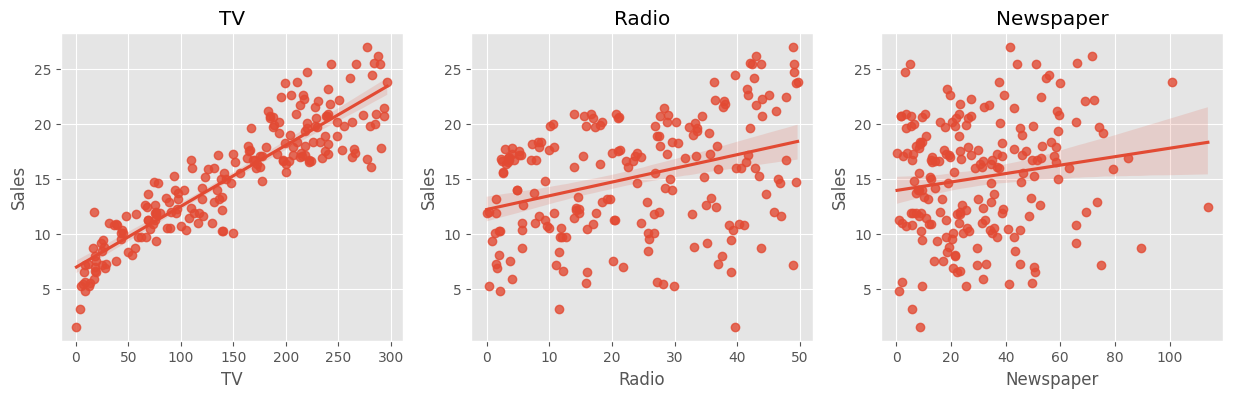

In [8]:
#그래프 크기
plt.figure(figsize=(15,4))

#tv 광고비에 따른 판매량
plt.subplot(1, 3, 1)
sns.regplot(data=df, x = 'TV', y = 'Sales')
plt.title('TV')

#Radio 광고비에 따른 판매량
plt.subplot(1, 3, 2)
sns.regplot(data=df, x = 'Radio', y = 'Sales')
plt.title('Radio')

#Newspaper 광고비에 따른 판매량
plt.subplot(1, 3, 3)
sns.regplot(data=df, x = 'Newspaper', y = 'Sales')
plt.title('Newspaper')

#그래프 그리기
plt.show()

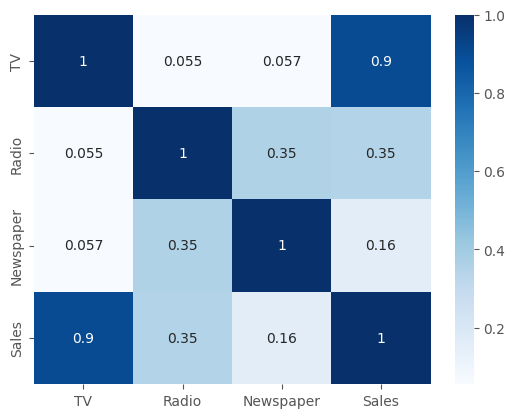

In [9]:
sns.heatmap(df.corr(), cmap='Blues', annot=True)
plt.show()

## Linear Regression

#### 변수 선택
TV는 독립변수 X, Sales는 종속변수 y

In [10]:
X = df[['TV']] # 독립변수는 2차원이어야 함
y = df['Sales']

df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


#### 훈련 세트, 테스트 세트 분할
X의 훈련, 테스트, y의 훈련,테스트로 분할

In [11]:
train_test_split?

Object `train_test_split` not found.


디폴트는 Shuffel: 데이터를 섞어서 나눠줌
디폴트 값
test_size = 0.25
train_size = 0.75

In [12]:
# 훈련세트, 테스트세트 분할
from sklearn.model_selection import train_test_split

# Randomstate를 설정하여 결과 값이 같게
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size = 0.25)

# 2차원 데이터가 X
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(150, 1) (50, 1) (150,) (50,)


Text(0.5, 1.0, 'train_test split')

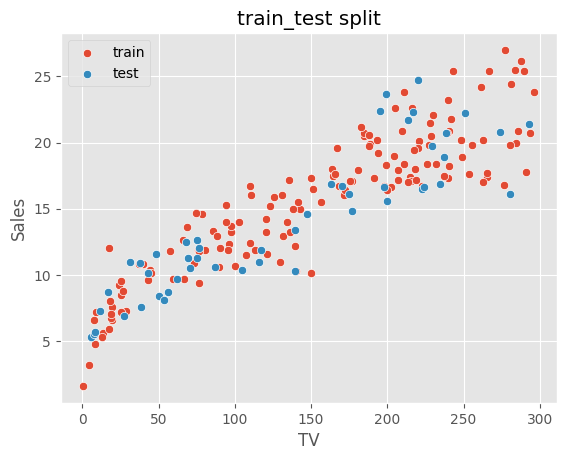

In [13]:
# 훈련세트, 테스트 세트 분할 확인(시각화)
sns.scatterplot(x=X_train['TV'], y=y_train, label = "train")
sns.scatterplot(x=X_test['TV'], y=y_test, label = "test")

# seaborn은 legend 없어도 됨, matplotlib은 있어야 함
plt.legend()
plt.title("train_test split")

### 모델 학습

#### 모델 생성 및 훈련

In [14]:
# LinearRegression 클래스 import
from sklearn.linear_model import LinearRegression

# 모델 생성하기
model = LinearRegression()

# 훈련데이터로 모델 훈련하기
# 훈련 함수는 fit인 경우가 많음
# y_train이 label
model.fit(X_train, y_train)

LinearRegression()

### 모델 평가

#### 테스트세트로 평가

In [15]:
# sklearn.metrics 에 모델 평가를 위한 함수가 가 있음
from sklearn.metrics import mean_squared_error, root_mean_squared_error, mean_absolute_error, r2_score

# 테스트 데이터의 예측값
pred = model.predict(X_test)

# 실제값과 예측값 비교
# print(f'예측값\n {pred}')
# print(f'실제값\n {y_test}')

# 예측값과 실제값의 차이(Loss/Error) 이용한 모델 평가
mse = mean_squared_error(y_test, pred)
rmse = root_mean_squared_error(y_test, pred)
mae = mean_absolute_error(y_test, pred)
r2 = r2_score(y_test, pred)
print(f'MSE : {mse:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'MAE : {mae:.2f}')
print(f'R2 : {r2:.2f}')


MSE : 5.51
RMSE: 2.35
MAE : 1.87
R2 : 0.80


실제값과 모델의 예측값 비교

In [16]:
df_pred = pd.DataFrame({'X_test':X_test['TV'], 
'y_test':y_test, 
'y_pred':pred})
df_pred['error'] = df_pred['y_test']-df_pred['y_pred']
df_pred.head(10)

,X_test,y_test,y_pred,error
95,163.3,16.9,16.143474,0.756526
15,195.4,22.4,17.921382,4.478618
30,292.9,21.4,23.321569,-1.921569
158,11.7,7.3,7.746876,-0.446876
128,220.3,24.7,19.300506,5.399494
115,75.1,12.6,11.258382,1.341618
69,216.8,22.3,19.106654,3.193346
170,50.0,8.4,9.868180,-1.468180
174,222.4,16.5,19.416818,-2.916818
45,175.1,16.1,16.797035,-0.697035


In [20]:
# 회귀모델의 평가점수 수동 계산

mae = abs(df_pred['error']).mean()
mse = np.square(df_pred['error']).mean()
rmse = np.sqrt(mse)
# print(mae)
# print(mse)
# print(rmse)

# r2_score
rss = np.square(df_pred['y_test'] - df_pred['y_pred']).sum()
tss = np.square(df_pred['y_test'] - df_pred['y_test'].mean()).sum()
r2 = 1 - (rss/tss)
 
print(f'''
mse : {mse:.2f}
rmse : {rmse:.2f}
mae : {mae:.2f}
r2 : {r2:.2f}
      ''')


mse : 5.51
rmse : 2.35
mae : 1.87
r2 : 0.80
      


### 모델의 학습 결과

모델의 학습 결과 회귀 계수(기울기)와 절편을 찾아냈을 것으로 정의

객체.메소드-> 함수  
객체.속성 -> 데이터, 변수

In [24]:
# 회귀계수(w)
w = model.coef_
print(f'회귀계수(coefficent): {model.coef_}')

#절편
b = model.intercept_
print(f'절편: {model.intercept_}')

# 회귀식
print(f'{w[0]} * TV + {b}')

회귀계수(coefficent): [0.05538653]
절편: 7.098853680118275
0.05538653085519158 * TV + 7.098853680118275


테스트데이터의 실제값과 예측값 확인

<Axes: xlabel='TV', ylabel='Sales'>

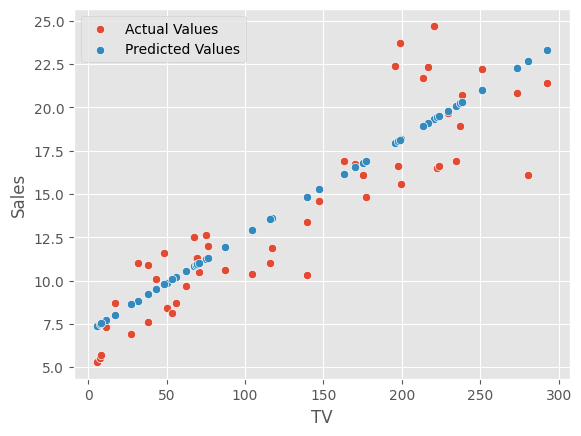

In [27]:
# 테스트데이터의 실제값과 예측값 확인(독립변수- 종속변수 관계 시각화)
sns.scatterplot(x=X_test['TV'], y = y_test, label = "Actual Values")
sns.scatterplot(x=X_test['TV'], y = pred, label = "Predicted Values")

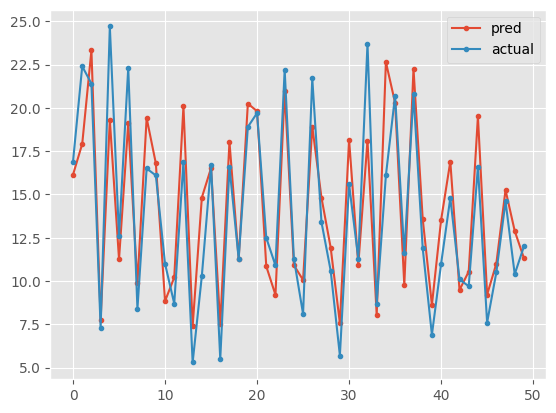

In [35]:
# 예측값
plt.plot(pred, marker = '.', label = 'pred')

# 실제값
# 데이터 프레임에서는 데이터 프레임 인덱스로 그래프를 그리게 됨
plt.plot(np.array(y_test), marker = '.', label = 'actual')
plt.legend()

#### 새로운 값 예측하기

In [38]:
# TV 광고비 입력 받기
TV = 100

# 예측 함수 사용하여 예측
model.predict([[TV]])

# 모델이 학습한 공식에 대입하여 예측
print(f'{w * TV +b}')

[12.63750677]


c:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## 다중 회귀

### 변수 선택

In [41]:
%whos

Variable                  Type                Data/Info
-------------------------------------------------------
LinearRegression          ABCMeta             <class 'sklearn.linear_mo<...>._base.LinearRegression'>
TV                        int                 100
X                         DataFrame                   TV\n0    230.1\n1<...>n\n[200 rows x 1 columns]
X_test                    DataFrame                   TV\n95   163.3\n1<...>3\n143  104.6\n86    76.3
X_train                   DataFrame                   TV\n114   78.2\n1<...>n\n[150 rows x 1 columns]
b                         float64             7.098853680118275
df                        DataFrame                   TV  Radio  Newspa<...>n\n[200 rows x 4 columns]
df_pred                   DataFrame                X_test  y_test     y<...>12.0  11.324846  0.675154
mae                       float64             1.8651146911099161
mean_absolute_error       function            <function mean_absolute_e<...>or at 0x000002364EC44

In [40]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [45]:
# 독립변수, 종속 변수 선택
x2 = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

### 독립변수의 데이터 분포 파악

<Axes: >

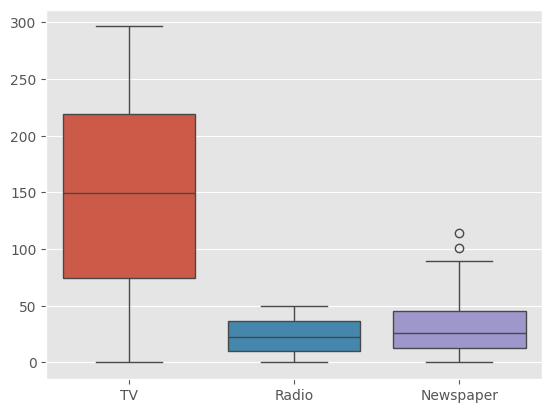

In [48]:
sns.boxplot(x2)

### 독립 변수 스케일링

In [58]:
# 데이터 스케일링
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#scaler.fit(x2)
# x2_scaled = scaler.transform(x2)
# x2_scaled
x2_scaled = scaler.fit_transform(x2)

scaled_TV = x2_scaled[:, 0]
scaled_Radio = x2_scaled[:, 1]
scaled_Newspaper = x2_scaled[:, 2]

print(f'scaled TV mean: {scaled_TV.mean()}, scaled Radio mean: {scaled_Radio.mean()}, scaled Newspaper mean: {scaled_Newspaper.mean()}')
print(f'scaled TV std: {scaled_TV.std()}, scaled Radio std: {scaled_Radio.std()}, scaled Newspaper std: {scaled_Newspaper.std()}')

scaled TV mean: 1.2212453270876723e-16, scaled Radio mean: -4.529709940470639e-16, scaled Newspaper mean: 2.220446049250313e-16
scaled TV std: 1.0, scaled Radio std: 1.0, scaled Newspaper std: 0.9999999999999999


### 훈련 및 평가

#### 모델 훈련

In [63]:
# 훈련세트, 테스트 세트 분할
from sklearn.model_selection import train_test_split
 
x2_train, x2_test, y2_train, y2_test = train_test_split(x2_scaled, y, random_state=42, train_size=0.75)
print(x2_train.shape, x2_test.shape, y_train.shape, y_test.shape)

(150, 3) (50, 3) (150,) (50,)


#### 모델 생성 및 학습

In [64]:
#모델 생성
model2 = LinearRegression()

# 모델 학습
model2.fit(x2_train, y_train)

LinearRegression()

### 모델 성능 평가

In [65]:
# 테스트데이터로 예측
pred = model2.predict(x2_test)
# 모델 평가
mse = mean_squared_error(y_test, pred)
rmse = root_mean_squared_error(y_test, pred)
mae = mean_absolute_error(y_test, pred)
r2 = r2_score(y_test, pred)

print('===다중회귀 모델의 평가결과===')
print(f'MSE:{mse:.2f}')
print(f'RMSE:{rmse:.2f}')
print(f'MAE:{mae:.2f}')
print(f'R2:{r2:.2f}')

===다중회귀 모델의 평가결과===
MSE:2.40
RMSE:1.55
MAE:1.12
R2:0.91


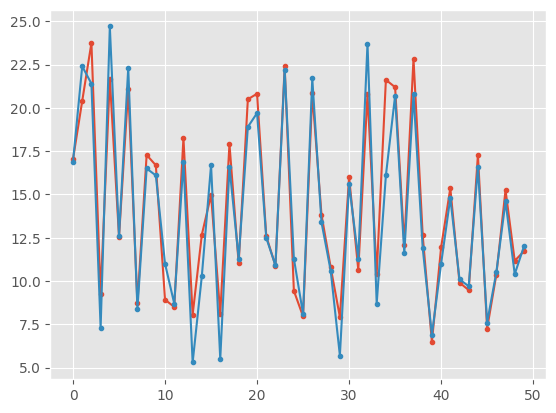

In [67]:
plt.plot(pred, marker='.', label='pred')
plt.plot(np.array(y_test), marker='.', label='pred')

### 모델의 학습 결과

In [69]:
# 모델의 학습 결과
print(f'회귀계수:{model2.coef_}')
print(f'절편:{model2.intercept_}')

w1 = model2.coef_[0]
w2 = model2.coef_[1]
w3 = model2.coef_[2]
b = model2.intercept_

print(f'회귀식:{w1} * tv + {w2} * radio + {w3} * newspaper + {b}')

회귀계수:[4.67709227 1.4774023  0.09352121]
절편:15.22473459736965
회귀식:4.677092268978724 * tv + 1.4774023036363388 * radio + 0.0935212124232997 * newspaper + 15.22473459736965


#### 새로운 값 예측하기

scaler 객체는 fit을 내부적으로 저장하고, 이를 나중에 transform을 사용할 때 활용  

-> 따라서 fit_transform을 하게 되면 새로운 fit이 적용되기 때문에 transform을 사용해야 해당 핏이 적용됨

In [76]:
# 예측 시에도 전처리를 반영하여야 함

new_data = [[175, 15, 2]]

# 새로운 값 전처리
new_data_scaled = scaler.transform(new_data)

# 전처리 된 값으로 예측
#print(model2.predict(new_data_scaled))

# 회귀식에 값을 대입하여 예측
print(f'{model2.coef_[0] * new_data_scaled[0, 0] + model2.coef_[1] * new_data_scaled[0, 1] + model2.coef_[2] * new_data_scaled[0, 2] + model2.intercept_}')

15.804265090536152


c:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
